# Is the weather in our favor for Spring Fling 2026?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
weather_df = pd.read_csv('data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

As a past Spring Fling Daytime director, the weather during the weekend has always been an important part of the experience. From being really cold at 6 am for setup to raining during the night so the field is wet, weather can make the experience for the volunteers and attendees more or less pleasant. Last year, it rained the night between Concerts and Daytime, but it also rained on and off between 6am and 3 pm of Saturday, which caused the festival to be delayed by 30 minutes.

![](img/flingsky25.jpg){width=300}

### How is it looking Spring Fling 2026?
This year, Spring Fling weekend will be on April 17 and 18. Using past 21 years of data, we might be able to estimate what the weather will be like for Fling Weekend.

In [4]:
concert26 = pd.to_datetime(
    dict(
        year=weather_df["date"].dt.year,
        month=4,
        day=17
    )
)

fling_end = concert26 + pd.Timedelta(days=1)

In [5]:
fweekend_filter = (weather_df['date']>=concert26) & (weather_df['date']<=fling_end)

In [6]:
flingweekend_df = (weather_df.
                    loc[fweekend_filter].
                    groupby('year')[['high','low','rain']].
                    agg(
                       [min,max,np.mean, np.std]
                    ).
                    round(1)
                )

At the time of setup, it is normally along the coldest parts of the day, so we can look at the lowest temperatures of April 17 and 18.

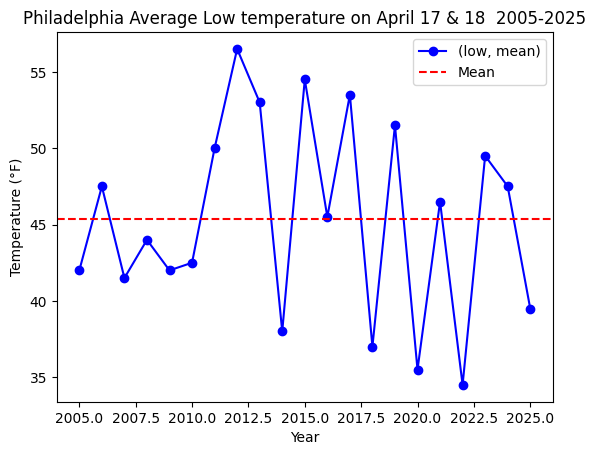

In [13]:
flingweekend_df['low','mean'].plot(kind='line', style='-o', color='b')
plt.axhline(flingweekend_df[('low','mean')].mean(), color='r', linestyle='--', label='Mean')
plt.title('Philadelphia Average Low temperature on April 17 & 18  2005-2025')
plt.ylabel('Temperature (°F)')
plt.xlabel('Year')
plt.legend()
plt.show()

As we can see, the coldest it has been was around 35 degrees in 2022. On the contrary, the the low has been higher than 55 in years like 2012. On average, the low during April 17 and 18 has been around 46 degrees Farenheit (or 7 degrees Celsius).

When looking at the highest temperatures throughout the days, we can see that the lowest highs happened on 2018, 2020, and 2022 with 50 degrees. On the contrary, we have gotten as high as 80 degrees on years like 2008. On average, the high for the pair of days seem to be around 65 degrees.

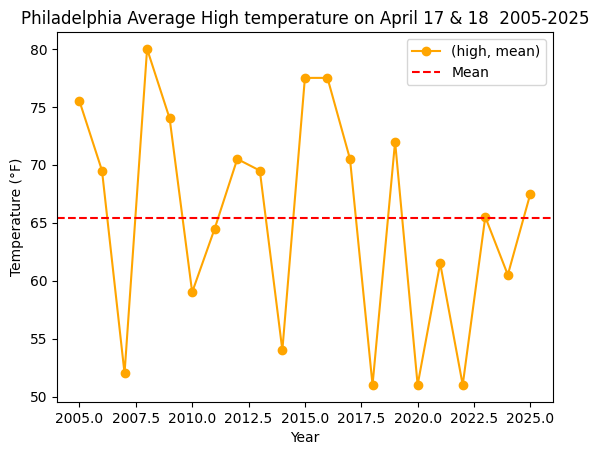

In [16]:
flingweekend_df['high','mean'].plot(kind='line', style='-o', color='orange')
plt.axhline(flingweekend_df[('high','mean')].mean(), color='r', linestyle='--', label='Mean')
plt.title('Philadelphia Average High temperature on April 17 & 18  2005-2025')
plt.ylabel('Temperature (°F)')
plt.xlabel('Year')
plt.legend()
plt.show()

Then, according to data from previous years, the average range of temperature on April 17 and April 18 seems to be from 45 to 65, which seems like a comfortable range. It might be useful for the directors and volunteers to layer up so they stay warm during set up, but they are not that hot during the festival itself.

#### What about rain?

Rain can be one of the less productive things to happen on Fling Weekend. In addition to making setup more uncomfortable, rain can make the operations cost of fling more expensive. If it rains during the Friday of the concert, it might make workers stop setting up the floor, which significantly increases labor costs.

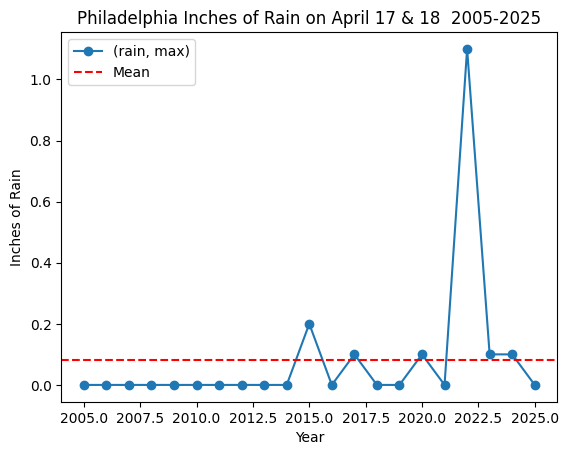

In [24]:
flingweekend_df['rain','max'].plot(kind='line', style='-o')
plt.axhline(flingweekend_df[('rain','max')].mean(), color='r', linestyle='--', label='Mean')
plt.title('Philadelphia Inches of Rain on April 17 & 18  2005-2025')
plt.ylabel('Inches of Rain')
plt.xlabel('Year')
plt.legend()
plt.show()

As shown in the graph, it looks like on average, there has been around 0.1 inches of rain during April 17 and 18 over the years. There has only been one year in which it rained torrentialy up to 1.1 inches.

If we take into account this data from previus year, it looks like it might be a good year for Spring Fling in terms of weather.